In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import glob
import pandas as pd
sns.set_style('whitegrid')
from scipy.stats import ranksums
from scipy.stats import ttest_ind

# Compare isoelectric points of secreted and non-secreted proteins forom three different choanoflagellate genomes

# Import Data

In [18]:
def parse_ip(filename):
    fh = open(filename)
    ips_dict = {}
    for line in fh:
        if line.startswith('>'):
            name = line.strip()
            ip = next(fh)
            ips = ip.strip().split()
            avg = float(ips[17])
        
            ips_dict[name] = avg
    return ips_dict

In [19]:
secreted_ip = parse_ip('/home/pwest/mono_lake/euk_binning/NKKH001C_out/clusters/merged_2/merged_scaffolds.maker.output/merged_scaffolds.all.maker.proteins.secreted.fasta.pI.txt')
nonsecreted_ip = parse_ip('/home/pwest/mono_lake/euk_binning/NKKH001C_out/clusters/merged_2/merged_scaffolds.maker.output/merged_scaffolds.all.maker.proteins.nonsecreted.fasta.pI.txt')

In [21]:
secreted_ip_df = pd.DataFrame.from_dict(secreted_ip, orient='index')
nonsecreted_ip_df = pd.DataFrame.from_dict(nonsecreted_ip, orient='index')

In [26]:
ros_secreted_ip = parse_ip('/home/pwest/mono_lake/choana_genomes/GCF_000188695.1_Proterospongia_sp_ATCC50818_protein.secreted.faa.pI.txt')
ros_nonsecreted_ip = parse_ip('/home/pwest/mono_lake/choana_genomes/GCF_000188695.1_Proterospongia_sp_ATCC50818_protein.nonsecreted.faa.pI.txt')
brev_secreted_ip = parse_ip('/home/pwest/mono_lake/choana_genomes/GCF_000002865.3_V1.0_protein.secreted.faa.pI.txt')
brev_nonsecreted_ip = parse_ip('/home/pwest/mono_lake/choana_genomes/GCF_000002865.3_V1.0_protein.nonsecreted.faa.pI.txt')

In [27]:
ros_secreted_ip_df = pd.DataFrame.from_dict(ros_secreted_ip, orient='index')
ros_nonsecreted_ip_df = pd.DataFrame.from_dict(ros_nonsecreted_ip, orient='index')
brev_secreted_ip_df = pd.DataFrame.from_dict(brev_secreted_ip, orient='index')
brev_nonsecreted_ip_df = pd.DataFrame.from_dict(brev_nonsecreted_ip, orient='index')

# Protein set average isolectric point and statistical tests

In [28]:
print('Monosierra average Ip:')
print('secreted: ' + str(np.mean(secreted_ip_df[0])))
print('nonsecreted: ' + str(np.mean(nonsecreted_ip_df[0])))
print('Rosetta average Ip:')
print('secreted: ' + str(np.mean(ros_secreted_ip_df[0])))
print('nonsecreted: ' + str(np.mean(ros_nonsecreted_ip_df[0])))
print('Brevicollis average Ip:')
print('secreted: ' + str(np.mean(brev_secreted_ip_df[0])))
print('nonsecreted: ' + str(np.mean(brev_nonsecreted_ip_df[0])))

Monosierra average Ip:
secreted: 6.22339676113
nonsecreted: 6.95289897304
Rosetta average Ip:
secreted: 5.93708954101
nonsecreted: 7.023338781
Brevicollis average Ip:
secreted: 5.92461051883
nonsecreted: 6.92009184197


In [31]:
ranksums(secreted_ip_df[0], ros_secreted_ip_df[0])

RanksumsResult(statistic=4.5093432415333199, pvalue=6.5028624081889384e-06)

In [32]:
ranksums(secreted_ip_df[0], brev_secreted_ip_df[0])

RanksumsResult(statistic=4.8242515640517887, pvalue=1.4052995813811172e-06)

In [33]:
ranksums(ros_secreted_ip_df[0], brev_secreted_ip_df[0])

RanksumsResult(statistic=-0.068565703840055614, pvalue=0.94533531896499423)

In [35]:
ttest_ind(secreted_ip_df[0], ros_secreted_ip_df[0])

Ttest_indResult(statistic=3.3451353445647265, pvalue=0.00083912674902750564)

In [36]:
ttest_ind(secreted_ip_df[0], brev_secreted_ip_df[0])

Ttest_indResult(statistic=3.5722848962270453, pvalue=0.00036269810289522527)

In [37]:
ttest_ind(ros_secreted_ip_df[0], brev_secreted_ip_df[0])

Ttest_indResult(statistic=0.19901475889316414, pvalue=0.84226599800136615)

# Plotting 

In [48]:
secreted_ip_df['secreted'] = 'Y'
secreted_ip_df['organism'] = 'S. monosierra'
nonsecreted_ip_df['secreted'] = 'N'
nonsecreted_ip_df['organism'] = 'S. monosierra'

ros_secreted_ip_df['secreted'] = 'Y'
ros_secreted_ip_df['organism'] = 'S. rosetta'
ros_nonsecreted_ip_df['secreted'] = 'N'
ros_nonsecreted_ip_df['organism'] = 'S. rosetta'

brev_secreted_ip_df['secreted'] = 'Y'
brev_secreted_ip_df['organism'] = 'M. brevicollis'
brev_nonsecreted_ip_df['secreted'] = 'N'
brev_nonsecreted_ip_df['organism'] = 'M. brevicollis'

In [49]:
df = pd.concat([secreted_ip_df, nonsecreted_ip_df, ros_secreted_ip_df, ros_nonsecreted_ip_df, brev_secreted_ip_df, brev_nonsecreted_ip_df])

In [50]:
df = df.rename(columns={0:'Ip'})

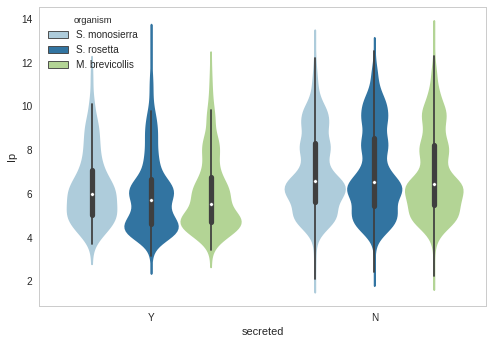

In [76]:
sns.set_palette("Paired")
ax = sns.violinplot(data=df, x='secreted', y='Ip', hue='organism', legend=False)
plt.grid(False)
plt.savefig('isoelectric_violinplots.pdf')

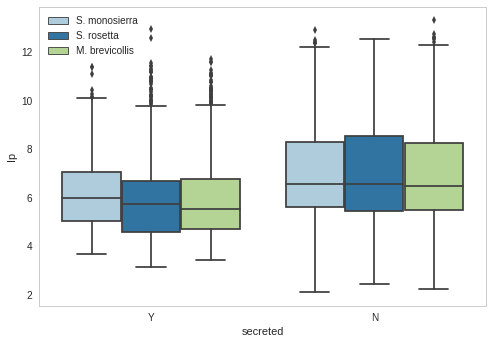

In [68]:
ax = sns.boxplot(data=df, x='secreted', y='Ip', hue='organism')
plt.legend(loc='best')
plt.grid(False)
#ax = sns.swarmplot(data=df, x='secreted', y='Ip', hue='organism')

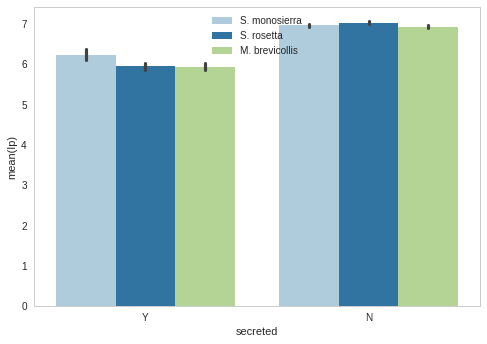

In [69]:
ax = sns.barplot(data=df, x='secreted', y='Ip', hue='organism')
plt.legend(loc='best')
plt.grid(False)

(array([  2.,   5.,   9.,  12.,  14.,  16.,  21.,  27.,  20.,  26.,  19.,
         18.,  22.,  18.,  26.,  23.,  18.,  19.,  22.,   9.,  15.,  11.,
         10.,   6.,  11.,   8.,   5.,   8.,   7.,   6.,   8.,   4.,   9.,
          4.,   5.,   8.,   5.,   4.,   1.,   2.,   1.,   5.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   2.]),
 array([  3.675 ,   3.8294,   3.9838,   4.1382,   4.2926,   4.447 ,
          4.6014,   4.7558,   4.9102,   5.0646,   5.219 ,   5.3734,
          5.5278,   5.6822,   5.8366,   5.991 ,   6.1454,   6.2998,
          6.4542,   6.6086,   6.763 ,   6.9174,   7.0718,   7.2262,
          7.3806,   7.535 ,   7.6894,   7.8438,   7.9982,   8.1526,
          8.307 ,   8.4614,   8.6158,   8.7702,   8.9246,   9.079 ,
          9.2334,   9.3878,   9.5422,   9.6966,   9.851 ,  10.0054,
         10.1598,  10.3142,  10.4686,  10.623 ,  10.7774,  10.9318,
         11.0862,  11.2406,  11.395 ]),
 <a list of 50 Patch objects>)

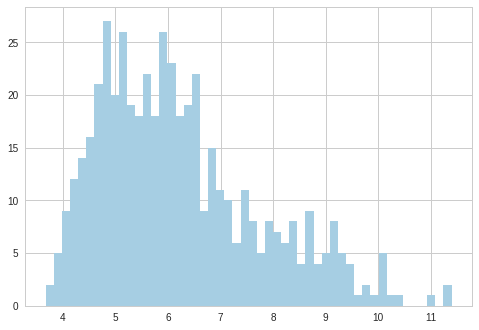

In [75]:
plt.hist(secreted_ip_df[0],bins=50)

(array([   3.,    1.,    5.,    3.,    5.,    6.,    7.,   22.,   30.,
          83.,  158.,  239.,  322.,  334.,  330.,  326.,  340.,  425.,
         454.,  481.,  461.,  351.,  255.,  219.,  187.,  181.,  211.,
         228.,  236.,  214.,  175.,  160.,  210.,  220.,  178.,  206.,
         145.,  100.,   70.,   51.,   33.,   38.,   29.,   20.,   14.,
          16.,    3.,    3.,    1.,    1.]),
 array([  2.084  ,   2.30026,   2.51652,   2.73278,   2.94904,   3.1653 ,
          3.38156,   3.59782,   3.81408,   4.03034,   4.2466 ,   4.46286,
          4.67912,   4.89538,   5.11164,   5.3279 ,   5.54416,   5.76042,
          5.97668,   6.19294,   6.4092 ,   6.62546,   6.84172,   7.05798,
          7.27424,   7.4905 ,   7.70676,   7.92302,   8.13928,   8.35554,
          8.5718 ,   8.78806,   9.00432,   9.22058,   9.43684,   9.6531 ,
          9.86936,  10.08562,  10.30188,  10.51814,  10.7344 ,  10.95066,
         11.16692,  11.38318,  11.59944,  11.8157 ,  12.03196,  12.24822,
        

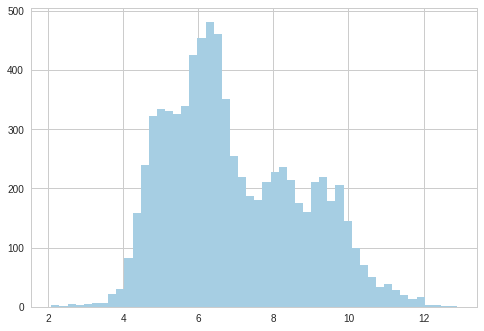

In [74]:
plt.hist(nonsecreted_ip_df[0],bins=50)